Необязательное ДЗ по лекции "Спектральная теория графов". Масляков Глеб, группа 517.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Изоспектральность деревьев

Будем генерировать случайные деревья и сравнивать спектр по метрике MSE для разного числа вершин.

Сначала маленькие деревья.

In [3]:
lst = []
for n in range(10, 101):
    mse = 0
    for _ in range(10):
        G_1 = nx.generators.trees.random_tree(n)
        G_2 = nx.generators.trees.random_tree(n)
        s_1 = nx.adjacency_spectrum(G_1).astype(np.float64)
        s_2 = nx.adjacency_spectrum(G_2).astype(np.float64)
        s_1.sort()
        s_2.sort()
        mse += np.mean(np.square(s_1 - s_2))
    lst.append(mse / 10)

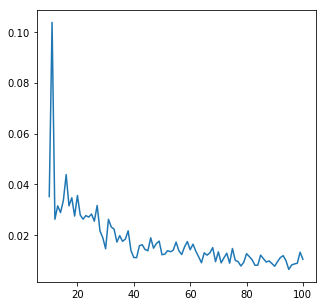

In [4]:
plt.figure(figsize=(5,5))
plt.plot(np.arange(10,101), lst)

Потом побольше.

In [5]:
lst = []
for n in range(100, 3001, 100):
    mse = 0
    for _ in range(10):
        G_1 = nx.generators.trees.random_tree(n)
        G_2 = nx.generators.trees.random_tree(n)
        s_1 = nx.adjacency_spectrum(G_1).astype(np.float64)
        s_2 = nx.adjacency_spectrum(G_2).astype(np.float64)
        s_1.sort()
        s_2.sort()
        mse += np.mean(np.square(s_1 - s_2))
    lst.append(mse / 10)

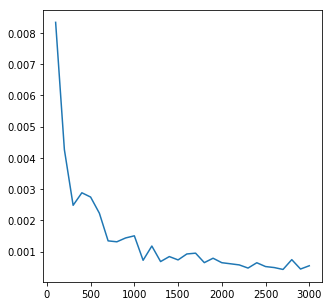

In [19]:
plt.figure(figsize=(5,5))
plt.plot(np.arange(100, 3001, 100), lst)

Видно, что MSE спектров двух случайно выбранных деревьев в среднем стремится к нулю при росте $n$.

Для деревьев большего размера уже вычислительно сложно считать спектр.

### Спектр Лапласа не распознаёт двудольность

Пример коспектральных в смысле Лапласа графов. Один из этих графов двудольный, другой нет.

In [3]:
G1 = nx.Graph()
G2 = nx.Graph()
G1.add_nodes_from([1,2,3,4,5,6])
G2.add_nodes_from([1,2,3,4,5,6])
G1.add_edges_from([(1,2), (2,3), (3,4), (4,1), (2,5), (5,6), (6,2)])
G2.add_edges_from([(1,2), (2,3), (3,4), (4,1), (2,5), (5,4), (5,6)])

В первом графе есть цикл нечётной длины $2 \rightarrow 5 \rightarrow 6 \rightarrow 2$. Значит он не является двудольным.

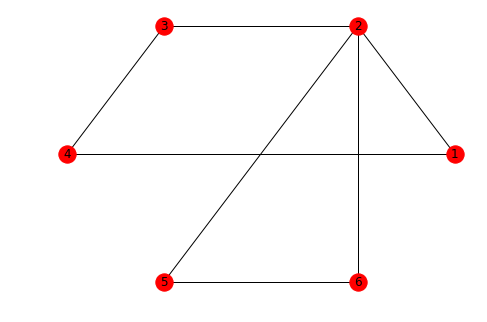

In [4]:
nx.draw_shell(G1, with_labels=True)

Во втором графе вершины $2,4,6$ и $3,5,1$ попарно несоединены. Значит он двудольный.

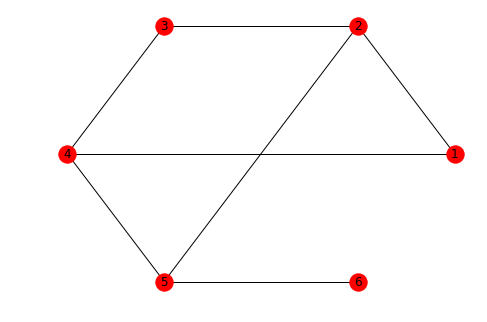

In [5]:
nx.draw_shell(G2, with_labels=True)

Матрица Лапласа первого графа

In [7]:
print(nx.laplacian_matrix(G1).toarray())

[[ 2 -1  0 -1  0  0]
 [-1  4 -1  0 -1 -1]
 [ 0 -1  2 -1  0  0]
 [-1  0 -1  2  0  0]
 [ 0 -1  0  0  2 -1]
 [ 0 -1  0  0 -1  2]]


Характеристический многочлен имеет вид: $(\lambda-3)^2(\lambda-2)\lambda (\lambda^2 - 6\lambda + 4)$

Матрица Лапласа второго графа.

In [8]:
print(nx.laplacian_matrix(G2).toarray())

[[ 2 -1  0 -1  0  0]
 [-1  3 -1  0 -1  0]
 [ 0 -1  2 -1  0  0]
 [-1  0 -1  3 -1  0]
 [ 0 -1  0 -1  3 -1]
 [ 0  0  0  0 -1  1]]


Характеристический многочлен также имеет вид: $(\lambda-3)^2(\lambda-2)\lambda (\lambda^2 - 6\lambda + 4)$

То есть их спектры Лапласа совпадают!

На всякий случай численно вычисленные собственные значения.

In [10]:
np.linalg.eigvalsh(nx.laplacian_matrix(G1).toarray())

array([-9.69399495e-16,  7.63932023e-01,  2.00000000e+00,  3.00000000e+00,
        3.00000000e+00,  5.23606798e+00])

In [11]:
np.linalg.eigvalsh(nx.laplacian_matrix(G2).toarray())

array([-1.21920032e-15,  7.63932023e-01,  2.00000000e+00,  3.00000000e+00,
        3.00000000e+00,  5.23606798e+00])